### *Описание проекта.*
#### Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

### *Цель проекта.*
#### Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Описание данных
*	Name — название игры
*	Platform — платформа
*	Year_of_Release — год выпуска
*	Genre — жанр игры
*	NA_sales — продажи в Северной Америке (миллионы проданных копий)
*	EU_sales — продажи в Европе (миллионы проданных копий)
*	JP_sales — продажи в Японии (миллионы проданных копий)
*	Other_sales — продажи в других странах (миллионы проданных копий)
*	Critic_Score — оценка критиков (максимум 100)
*	User_Score — оценка пользователей (максимум 10)
*	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### *Проект подготовлен Дмитрием Фроловым.*

### ШАГ 1. Открываем файл с данными и изучаем общую информацию.

In [ ]:
# Загружаем библиотеки.
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

In [ ]:
# Загружаем данные.
games = pd.read_csv('/datasets/games.csv')

In [ ]:
# проверяем размер датасета.
games.shape

(16715, 11)

In [ ]:
# выводим список столбцов и их типов данных.
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
# выводим предварительный просмотр первых нескольких записей.
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
# сразу проверим датасет на наличие явных дубликатов, чтобы не обрабатывать заведомо некорректные данные.
print('Количество явных дубликатов:', games.duplicated().sum())

Количество явных дубликатов: 0


In [ ]:
# проверяем датасет на количество пропусков
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [ ]:
# посмотрим на состав и количество в столбце 'Platform'
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [ ]:
# поcмотрим на состав и количество в столбце 'Genre'
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

#### Вывод.
* прочли файл games;
* проверили размер датасета:  строк - 16715, столбцов - 11;
* вывели список список столбцов и их типов данных;
* проверили на наличие явных дубликатов, дубликаты отсутствуют;
* проверили датасет на наличие пропусков.
* посмотрели на состав и количество повторов в столбцах 'Platform' и 'Genre'.

### ШАГ 2. Подготавливаем данные.

In [ ]:
# приводим названия столбцов к нижнему регистру.
games.columns = games.columns.str.lower()

In [ ]:
# приведем названия cтолбцов к нижнему регистру методом str.lower().
games['name'] = games['name'].str.lower()
games['platform'] = games['platform'].str.lower()
games['genre'] = games['genre'].str.lower()
games['user_score'] = games['user_score'].str.lower()
games['rating'] = games['rating'].str.lower()

In [ ]:
# проверяем изменения в столбцах после приведений к нижнему регистру.
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Манипуляции с tbd.
##### В столбце 'user_score' присутствует аббревиатура tbd. To Be Decided или To Be Determined TBD. Будет определено. TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. По этой причине предлагаю заменить 'tbd' на 'NaN'.


In [ ]:
# заменим tbd на Nan
games['user_score'] = games['user_score'].replace('tbd', np.nan, regex=True)

#### Преобразование данных в необходимые типы.
*  year_of_release - меняем с float на int, так как год должен быть целым   числом;
* critic_score - меняем с float64 на int, поскольку рейтинг критиков представляет собой целые числа;
* user_score - меняем с object на float, поскольку рейтинг пользователей представляет собой вещественные числа.  

In [ ]:
# преобразовываем данные столбца 'year_of_release' в тип int 
games['year_of_release'] = games['year_of_release'].astype('Int64', errors = 'ignore')
games['critic_score'] = pd.to_numeric(games['critic_score'], downcast='integer')
games['user_score'] = pd.to_numeric(games['user_score'], downcast='float', errors ='coerce')

In [ ]:
# проверяем изменение типа.
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
dtypes: Int64(1), float32(1), float64(5), object(4)
memory usage: 1.4+ MB


In [ ]:
# определяем пропуски в столбцах
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [ ]:
# Удаляем строки с NaN в столбцах name, year_of_release, genre.
games = games.dropna(subset=['name','year_of_release', 'genre'])

In [ ]:
# определяем пропускм в столбцах после удаления
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [ ]:
# посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец. Проверим вызовом метода head()
#df[['column_1','column_2','column_3', 'column_4']].sum(axis = 1)
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,e,28.32
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [ ]:
# проверяем размер датасета после преобразований.
games.shape

(16444, 12)

#### Вывод.
* изначальное количество строк в датасете - 16715, после преобразований - 16444. Уменьшилось на 271 строку за счет удаления пропусков в столбцах - 'year_of_release', 'name' и 'genre';
* приведен в нужный тип данных int столбец  'year_of_release', поскольку год должен быть целым числом;
* посчитаны суммарные продажи и записаны в отдельный столбец 'total_sales'.

### ШАГ 3. Проводим исследовательский анализ данных.

#### Уточняем сколько игр выпускалось в разные годы.

In [ ]:
# применяем метод value_counts() для расчета количества игр в разрезе годов.
games['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

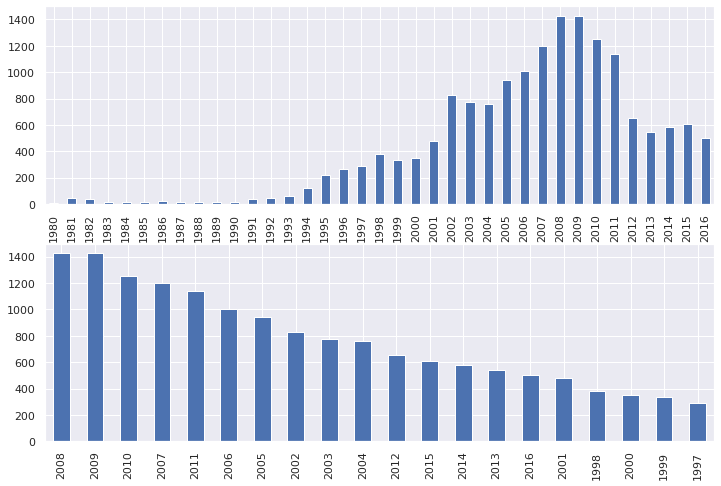

In [ ]:
# выводим столбчатую гистограмму в двух разрезах.
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

games['year_of_release'].value_counts().sort_index().plot.bar(
    ax=axes[0]
)

games['year_of_release'].value_counts().head(20).plot.bar(
    ax=axes[1]
);

##### На гистограмме видно, что с 1980 года по 1990 год количество продаж было относительно малым, с 1991 год наблюдался рост вплоть до 2008-2009 года, затем количество продаж пошло на убыль до 2016 года. 

In [ ]:
# посмотрим как менялись продажи по платформам по годам.
platform_year = pd.pivot_table(games,
               index = ['platform'],
               columns = ['year_of_release'],
               values = ['total_sales'],
               aggfunc = 'sum',
               fill_value = 0,
               margins = True)
display(platform_year)

total_sales                                                   \
year_of_release        1980   1981   1982   1983   1984   1985   1986   1987   
platform                                                                       
2600                  11.38  35.68  28.88   5.84   0.27   0.45   0.67   1.94   
3do                    0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
3ds                    0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
dc                     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
ds                     0.00   0.00   0.00   0.00   0.00   0.02   0.00   0.00   
gb                     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
gba                    0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
gc                     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
gen                    0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
gg                     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
n64                    0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
nes                    0.00   0.00   0.00  10.96  50.08  53.44  36.41  19.76   
ng                     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
pc                     0.00   0.00   0.00   0.00   0.00   0.04   0.00   0.00   
pcfx                   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
ps                     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
ps2                    0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
ps3                    0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
ps4                    0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
psp                    0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
psv                    0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
sat                    0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
scd                    0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
snes                   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
tg16                   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
wii                    0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
wiiu                   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
ws                     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
x360                   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
xb                     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
xone                   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
All                   11.38  35.68  28.88  16.80  50.35  53.95  37.08  21.70   

                               ...                                          \
year_of_release   1988   1989  ...    2008    2009    2010    2011    2012   
platform                       ...                                           
2600              0.74   0.63  ...    0.00    0.00    0.00    0.00    0.00   
3do               0.00   0.00  ...    0.00    0.00    0.00    0.00    0.00   
3ds               0.00   0.00  ...    0.00    0.00    0.00   63.20   51.36   
dc                0.00   0.00  ...    0.04    0.00    0.00    0.00    0.00   
ds                0.00   0.00  ...  145.31  119.54   85.02   26.18   11.01   
gb                1.43  64.97  ...    0.00    0.00    0.00    0.00    0.00   
gba               0.00   0.00  ...    0.00    0.00    0.00    0.00    0.00   
gc                0.00   0.00  ...    0.00    0.00    0.00    0.00    0.00   
gen               0.00   0.00  ...    0.00    0.00    0.00    0.00    0.00   
gg                0.00   0.00  ...    0.00    0.00    0.00    0.00    0.00   
n64               0.00   0.00  ...    0.00    0.00    0.00    0.00    0.00   
nes              45.01   7.85  ...    0.00    0.00    0.00    0.00    0.00   
ng                0.00   0.00  ...    0.00   

In [ ]:
# отсортируем суммарные продажи по убыванию.
total_sales_sum = {'total_sales': 'sum' }
plat_sales = games.groupby(['platform']).agg(total_sales_sum)
display(plat_sales.sort_values('total_sales', ascending = False))

,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


Text(0, 0.5, 'Продажи')

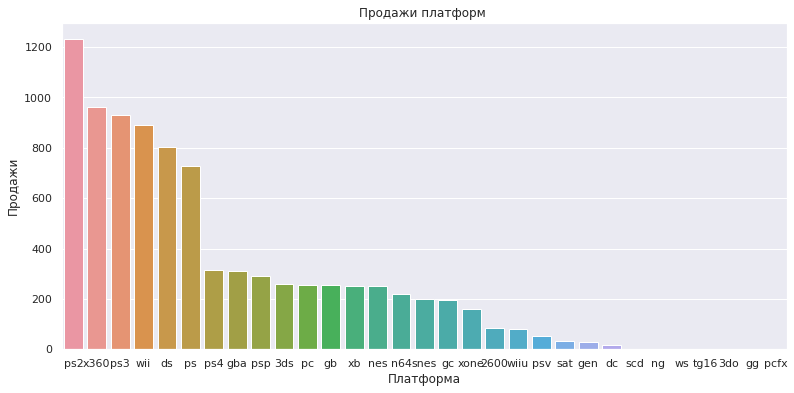

In [ ]:
# построим гистограмму продаж платформ.
platform_sales = games.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(13,6))
sns.barplot(x=platform_sales.index,y=platform_sales['total_sales'])
plt.title("Продажи платформ ")
plt.xlabel("Платформа")
plt.ylabel("Продажи")

##### рассмотрим далее гистограммы распределения по годам по платформам с наибольшими суммарными продажами (top-5):
* ps2
* x360
* ps3
* wii
* ds

In [ ]:
# делаем срез из датафрейма games по платформам из top-5 (ps2, x360, ps3, wii, ds)
top5 = games.query('platform == "ps2" or platform == "x360" or platform == "ps3" or platform == "wii" or platform == "ds"')

In [ ]:
#Составим список платформ из top-5.
top5_list = top5['platform'].unique()
top5_list

array(['wii', 'ds', 'x360', 'ps3', 'ps2'], dtype=object)

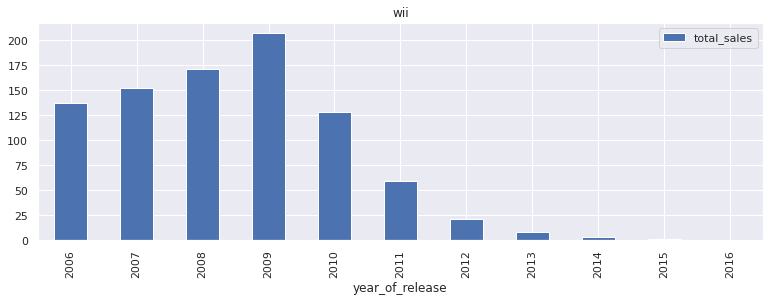

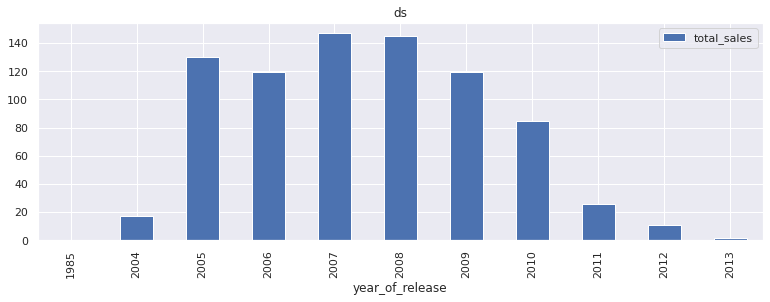

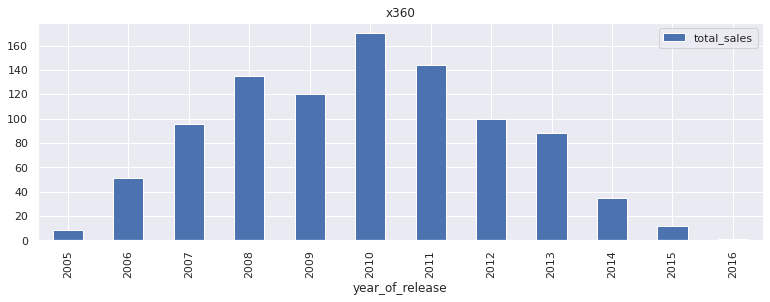

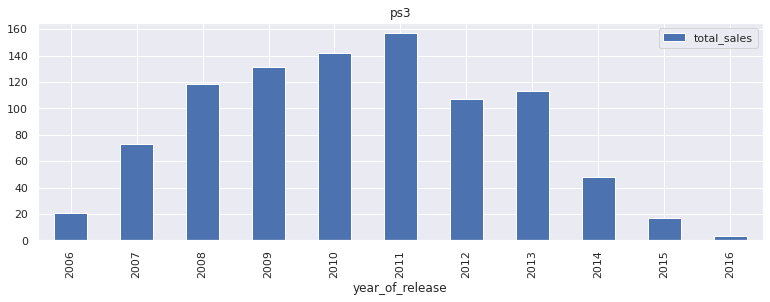

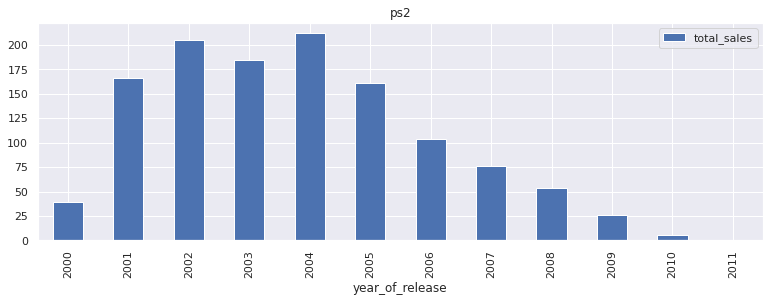

In [ ]:
#Построим распределения по годам для каждой платформы.
for platform in top5_list:
    top5[top5['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)

#### на основании представленных гистограмм можно сделать вывод, что жизненный цикл платформы находится в диапазоне 10-11 лет.

#### Определим соответствующий актуальный период.

In [ ]:
#Сгруппируем данные и определим за какой характерный срок появляются новые и исчезают старые платформы.
z = top5.pivot_table(values='year_of_release', index='platform', aggfunc=lambda x: len(x.unique())).median()
print('Медиана жизненного цикла платформ из списка top-5 = ', int(z[0]), 'лет')

Медиана жизненного цикла платформ из списка top-5 =  11 лет


#### предлагаю считать актуальным периодом половину периода от медианы жизненного цикла = 11/2 = 5,5 лет, округлим до 5 лет. Таким образом, диапазон соответствующего актуального периода будет охватывать период с 2012 до 2016 года.

#### Определим платформы, которые лидируют, растут или падают и выберем несколько потенциально прибыльных платформ.

In [ ]:
games['year_of_release'] = games['year_of_release'].astype('int')

In [ ]:
# делаем срез по данным с 2012 года.
games_act = games.query('year_of_release >= 2012')

In [ ]:
# отсортируем суммарные продажи по убыванию с 2012 года.
total_sales_sum1 = {'total_sales': 'sum' }
platform_sales1 = games_act.groupby(['platform']).agg(total_sales_sum1)
display(platform_sales1.sort_values('total_sales', ascending = False))

,total_sales
platform,
ps4,314.14
ps3,288.79
x360,236.54
3ds,194.61
xone,159.32
wiiu,82.19
pc,62.65
psv,49.18
wii,35.37


Text(0, 0.5, 'Продажи')

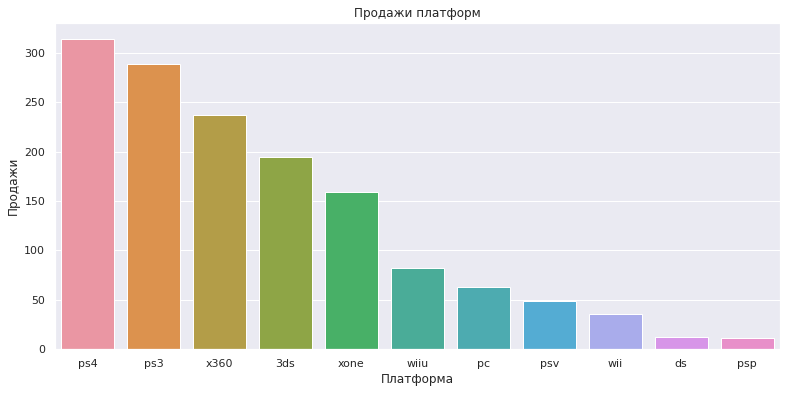

In [ ]:
# построим гистограмму продаж платформ за актульный период времени с 2012 года.
platform_sales1 = games_act.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(13,6))
sns.barplot(x=platform_sales1.index,y=platform_sales1['total_sales'])
plt.title("Продажи платформ")
plt.xlabel("Платформа")
plt.ylabel("Продажи")

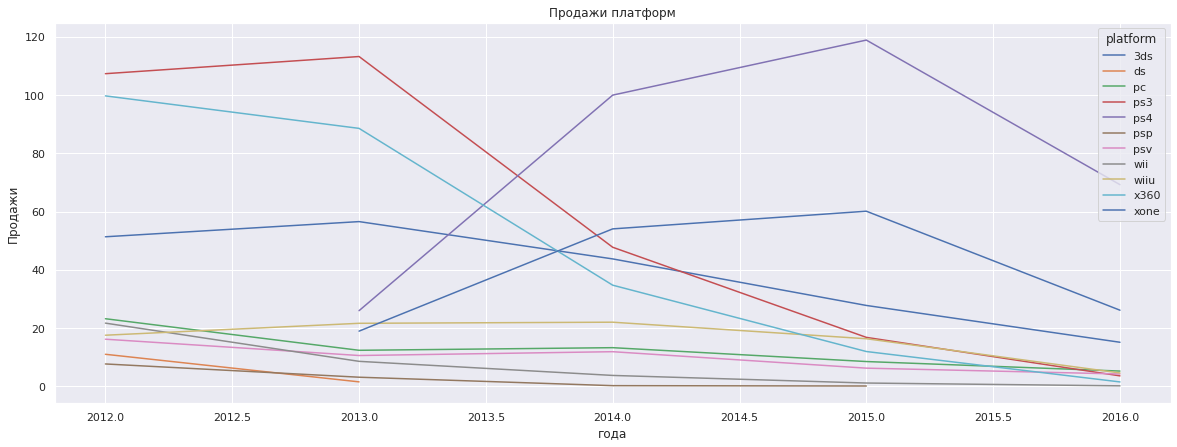

In [ ]:
games_line = games_act.pivot_table(index='year_of_release',
                             columns ='platform',
                             values='total_sales',
                             aggfunc='sum' )

games_line.plot(figsize=(20,7))
plt.title('Продажи платформ')
plt.xlabel('года')
plt.ylabel('Продажи')
plt.show()

#### C 2012 года лидируют по продажам платформы: ps4, ps3, x360.
* рост продаж не наблюдается ни у одной из платформ исходя из графика.

#### Потенциально прибыльные продажи определим по топ-списку из 5 платформ лидирующих по продажам за последний актуальный год - за 2016 года.

In [ ]:
top5_2016 = games.query('year_of_release == 2016')

Text(0, 0.5, 'Продажи')

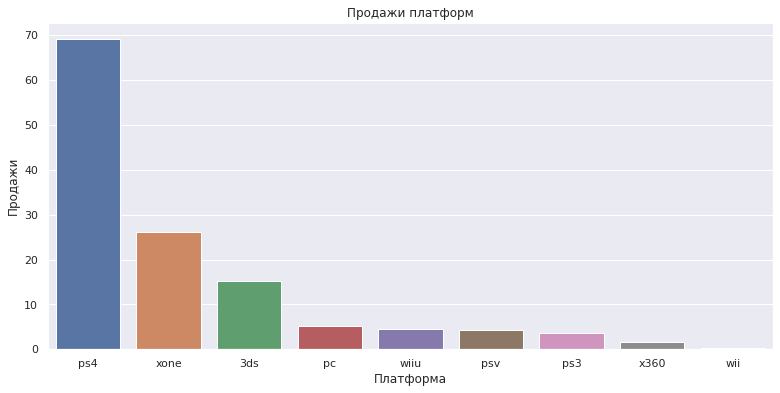

In [ ]:
# построим гистограмму потенциально прибыльных платформ за 2016 г.
platform_sales2 = top5_2016.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(13,6))
sns.barplot(x=platform_sales2.index,y=platform_sales2['total_sales'])
plt.title("Продажи платформ")
plt.xlabel("Платформа")
plt.ylabel("Продажи")

In [ ]:
top5_2016_upd = top5_2016.query('platform == "ps4" or platform == "xone" or platform == "3ds" or platform == "pc" or platform == "wiiu"')

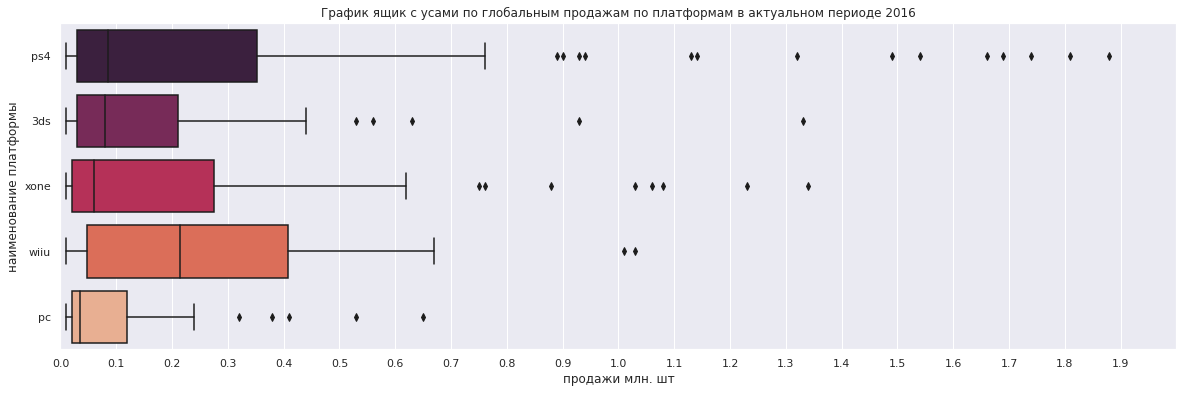

In [ ]:
# диаграмма размах по общим продажам в разрезе платформ
fig, ax = plt.subplots(figsize=(20,6))
sns.boxplot(y="platform", x='total_sales', data=top5_2016_upd, orient='h', palette='rocket')
ax.set_xticks(np.arange(0,2,0.1))
plt.title('График ящик с усами по глобальным продажам по платформам в актуальном периоде 2016')
ax.set_xlabel('продажи млн. шт')
ax.set_ylabel('наименование платформы')
ax.set_xlim(0, 2)
plt.show()

 #### Резюме.
 * самое большое медианное значение и межквартильный размах у платформы wiiu;
 * самое маленькое медианное значение и самые маленькие "усы" у платформы pc;
 * наибольшее количество выбросов и самые длинные "усы" наблюдается у платформы ps4.
 * наличие подобных продолжительных выбросов у платформы ps4 и xone может быть связано с постэффектом прежней популярности - они продавались большими партиями.


#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков - ps4. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

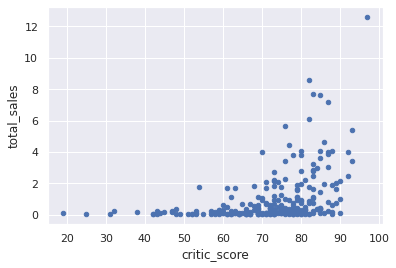

In [ ]:
# Сгенерируем диаграмму рассеяния, показывающую взаимосвязь между продажами и рейтингом критиков для популярной платформы ps4.
ps4 = games_act.query('platform == "ps4"')
ps4.plot(x = 'critic_score', y = 'total_sales', kind = 'scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

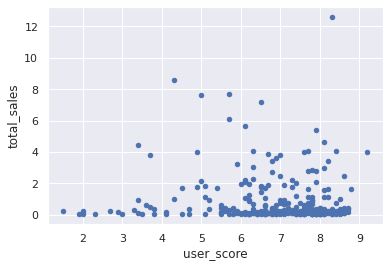

In [ ]:
# Сгенерируем диаграмму рассеяния, показывающую взаимосвязь между продажами и рейтингом пользователей для популярной платформы ps4.
ps4.plot(x = 'user_score', y = 'total_sales', kind = 'scatter')

In [ ]:
# рассчитываем корреляцию для столбцов 'critic_score' и 'total_sales'
print('корреляция для платформы ps4 =', ps4['critic_score'].corr(ps4['total_sales']))

корреляция для платформы ps4 = 0.40656790206178095


In [ ]:
# рассчитываем корреляцию для столбцов 'user_score' и 'total_sales'
print('корреляция для платформы ps4 =', ps4['user_score'].corr(ps4['total_sales']))

корреляция для платформы ps4 = -0.031957109005188264


#### Соотнесем выводы с продажами игр на других платформах.

In [ ]:
# делаем срез из датафрейма games по платформам из top-5 (ps3, x360, 3ds, xone)
top5_scat = games_act.query('platform == "ps3" or platform == "x360" or platform == "3ds" or platform == "xone"')

In [ ]:
#Составим список платформ из top-5.
top5_scat_list = top5_scat['platform'].unique()
top5_scat_list

array(['ps3', 'x360', '3ds', 'xone'], dtype=object)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

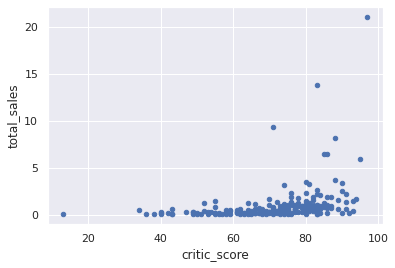

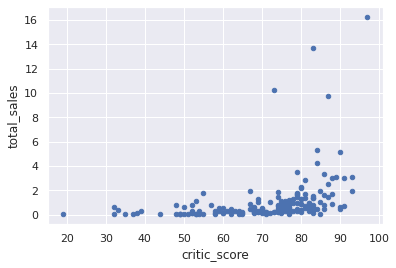

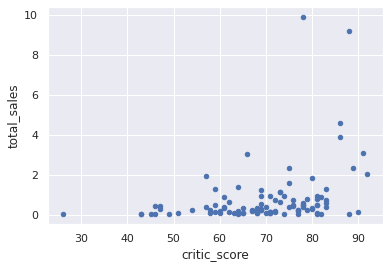

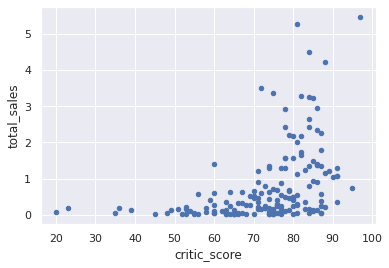

In [ ]:
# напишем цикл и сгенерируем диаграммы рассеяния для ps3, x360, 3ds, xone для оценок критиков.
for platform in top5_scat_list:
  top5_scat[top5_scat['platform'] == platform].plot(x = 'critic_score', y = 'total_sales', kind = 'scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

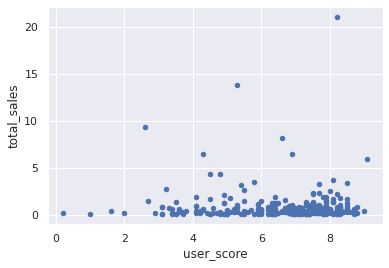

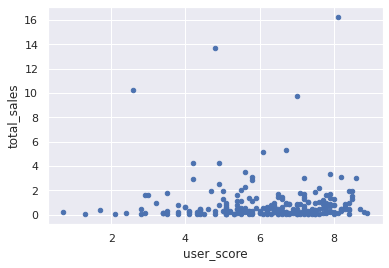

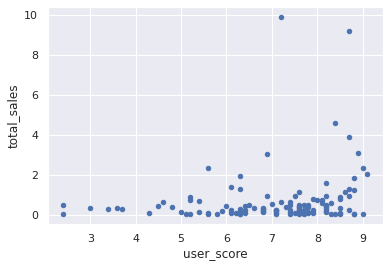

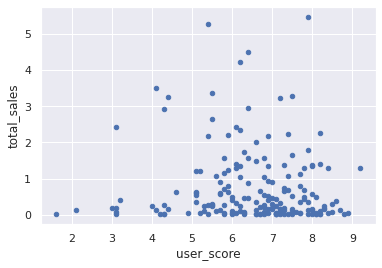

In [ ]:
# напишем цикл и сгенерируем диаграммы рассеяния для ps3, x360, 3ds, xone для оценок пользователей.
for platform in top5_scat_list:
  top5_scat[top5_scat['platform'] == platform].plot(x = 'user_score', y = 'total_sales', kind = 'scatter')

In [ ]:
# рассчитываем корреляцию для столбцов 'critic_score' и 'total_sales' для остальных платформ из top-5.
for platform in top5_scat_list:
  print('корреляция для платформы ' + str(platform), '=', top5_scat[top5_scat['platform'] == platform]['critic_score'].
        corr(top5_scat[top5_scat['platform'] == platform]['total_sales']))

корреляция для платформы ps3 = 0.3314972592629587
корреляция для платформы x360 = 0.3605734888507336
корреляция для платформы 3ds = 0.3208028695360785
корреляция для платформы xone = 0.4169983280084017


In [ ]:
# рассчитываем корреляцию для столбцов 'user_score' и 'total_sales' для остальных платформ из top-5.
for platform in top5_scat_list:
  print('корреляция для платформы ' + str(platform), '=', top5_scat[top5_scat['platform'] == platform]['user_score'].
        corr(top5_scat[top5_scat['platform'] == platform]['total_sales']))

корреляция для платформы ps3 = -0.005143521263447908
корреляция для платформы x360 = 0.00616398880247941
корреляция для платформы 3ds = 0.19758261153521017
корреляция для платформы xone = -0.06892505319711206


#### Вывод исходя из полученных данных по корреляции:
#### по платформе ps4:
* рейтинг критиков - суммарные продажи - корр = 0.41 - слабовыраженная корреляция.
* рейтинг пользователей цена - суммарные продажи - корр = -0.03 - корреляция отсутствует.
#### по платформе ps3:
* рейтинг критиков - суммарные продажи - корр = 0.33 - слабовыраженная корреляция.
* рейтинг пользователей цена - суммарные продажи - корр = -0.005 - корреляция отсутствует.
#### по платформе x360:
* рейтинг критиков - суммарные продажи - корр = 0.36 - слабовыраженная корреляция.
* рейтинг пользователей цена - суммарные продажи - корр = 0.006 - корреляция отсутствует.
#### по платформе 3ds:
* рейтинг критиков - суммарные продажи - корр = 0.32 - слабовыраженная корреляция.
* рейтинг пользователей цена - суммарные продажи - корр = 0.20 -  корреляция отсутствует.
#### по платформе xone:
* рейтинг критиков - суммарные продажи - корр = 0.42 - слабая корреляция.
* рейтинг пользователей цена - суммарные продажи - корр = -0.07 - корреляция отсутствует.

####  Вывод.
#### между рейтингом критиков и суммарными продажами присутствует слабовыраженная корреляция и корреляция отсутствует между рейтингом пользователей и суммарными продажами.




#### определим жанр, где игры приносят стабильно высокий доход.

In [ ]:
genre_top5 = top5_2016.pivot_table(index='genre',
                           values='total_sales',
                           aggfunc='mean').sort_values(by='total_sales', ascending=False)
genre_top5 = genre_top5.reset_index().rename_axis(None, axis=1)
genre_top5

,genre,total_sales
0,shooter,0.813191
1,sports,0.489375
2,role-playing,0.336667
3,fighting,0.279375
4,platform,0.215333
5,action,0.169157
6,racing,0.116250
7,simulation,0.105000
8,strategy,0.086923
9,misc,0.081250


Text(0, 0.5, 'total_sales')

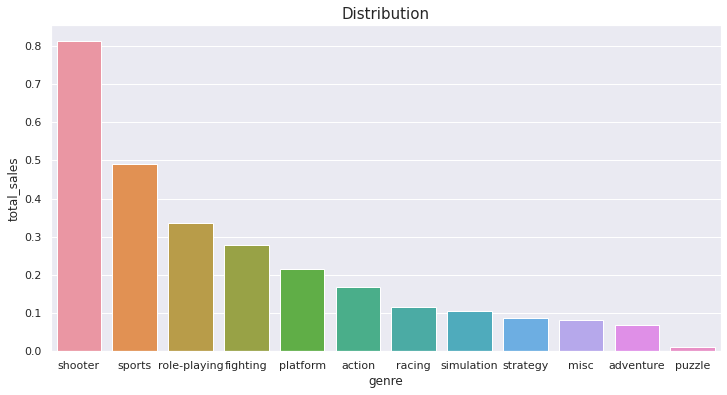

In [ ]:
# выведем гистограмму распределения продаж по жанрам по убыванию.
plt.figure(figsize=(12,6))
plt.title('Distribution',fontsize=15)
sns.barplot(data=genre_top5, x='genre', y='total_sales')
plt.xlabel('genre',fontsize=12)
plt.ylabel('total_sales',fontsize=12)

#### Самые прибыльные жанры:
* shooter;
* sports;
* role-playing.
#### Низкие продажи наблюдаются у:
* misc;
* adventure;
* puzzle.

##### Вывод.

1. В период  с 1980 года по 1990 год количество продаж было относительно малым, с 1991 год наблюдался рост вплоть до 2008-2009 года, затем количество продаж пошло на убыль до 2016 года. 
2. Топ-5 платформ с наибольшими суммарными продажами (top-5):
* ps2
* x360
* ps3
* wii
* ds.
3. Жизненный цикл платформы находится в диапазоне 10-11 лет.
4. Диапазон соответствующего актуального периода охватывает период с 2012 до 2016 года.
5. C 2012 года лидируют по продажам платформы: ps4, ps3, x360.
* рост продаж не наблюдается ни у одной из платформ.
6. Потенциально прибыльными платформами по отношению к 2016 году являются:
* ps4;
* xone;
* 3ds
7. резюме по графику "ящик с усами"
* самое большое медианное значение и межквартильный размах у платформы wiiu;
* самое маленькое медианное значение и самые маленькие "усы" у платформы pc;
* наибольшее количество выбросов и самые длинные "усы" наблюдается у платформы ps4.
* наличие подобных продолжительных выбросов у платформы ps4 и xone может быть связано с постэффектом прежней популярности - они продавались большими партиями.
8. Вывод исходя из полученных данных по корреляции:
* между рейтингом критиков и суммарными продажами присутствует слабовыраженная корреляция;
* корреляция отсутствует между рейтингом пользователей и суммарными продажами.
9. Самые прибыльные жанры:
* shooter;
* sports;
* role-playing.
10. Низкие продажи наблюдаются у:
* misc;
* adventure;
* puzzle.


### ШАГ 4. Составляем портрет пользователя каждого региона.

#### Портрет пользователя Северной Америки.
#### Самые популярные платформы.

In [ ]:
na_rel = games.loc[(games['na_sales']!=0)&(games['year_of_release'] == 2016)]
# формируем сводную таблицу.
na_dist = na_rel.pivot_table(index='platform', values='na_sales',aggfunc='count',margins=True,margins_name='total').reset_index()
# добавляем столбец sales_%.
na_dist['sales_%'] = round(na_dist['na_sales']*100/na_dist.iloc[-1, 1], 2)
na_dist.drop(na_dist.index[-1], inplace=True)
# выводим доли продаж по убыванию по первым 5 платформам.
display(na_dist.sort_values('na_sales',ascending=False).reset_index().head())

,index,platform,na_sales,sales_%
0,3,ps4,114,40.43
1,8,xone,79,28.01
2,1,pc,21,7.45
3,0,3ds,19,6.74
4,2,ps3,17,6.03


##### Самые популярные платформы в Северной Америке:
* ps4;
* xone;
* pc;
* 3ds;
* ps3.

#### Портрет пользователя Европы.
#### Самые популярные платформы.


In [ ]:
eu_rel = games.loc[(games['eu_sales']!=0)&(games['year_of_release'] == 2016)]
# формируем сводную таблицу.
eu_dist = top5_2016.pivot_table(index='platform', values='eu_sales',aggfunc='count',margins=True, margins_name = 'total').reset_index()
# добавляем столбец sales_%.
eu_dist['sales_%'] = round(eu_dist['eu_sales']*100/eu_dist.iloc[-1, 1], 2)
eu_dist.drop(eu_dist.index[-1], inplace=True)
# выводим доли продаж по убыванию по первым 5 платформам.
display(eu_dist.sort_values('eu_sales',ascending=False).reset_index().head())

,index,platform,eu_sales,sales_%
0,3,ps4,164,32.67
1,8,xone,87,17.33
2,4,psv,85,16.93
3,1,pc,54,10.76
4,0,3ds,46,9.16


##### Самые популярные платформы в Европе:
* ps4;
* xone;
* psv;
* pc;
* 3ds.

#### Портрет пользователя Японии.
#### Самые популярные платформы.

In [ ]:
# делаем срезы из датафрейма
jp_rel = games.loc[(games['jp_sales']!=0)&(games['year_of_release'] == 2016)]
# формируем сводную таблицу.
jp_dist = jp_rel.pivot_table(index='platform', values='jp_sales',aggfunc='count',margins=True, margins_name = 'total').reset_index()
# добавляем столбец sales_%.
jp_dist['sales_%'] = round(jp_dist['jp_sales']*100/jp_dist.iloc[-1, 1], 2)
jp_dist.drop(jp_dist.index[-1], inplace=True)
# выводим доли продаж по убыванию по первым 5 платформам.
display(jp_dist.sort_values('jp_sales',ascending=False).reset_index().head())

,index,platform,jp_sales,sales_%
0,2,ps4,84,35.59
1,3,psv,81,34.32
2,0,3ds,39,16.53
3,1,ps3,24,10.17
4,4,wiiu,7,2.97


##### Самые популярные платформы в Японии:
* ps4;
* psv;
* 3ds;
* ps3;
* wiiu.

#### Резюме по кейсу "популярные платформы".
* Самые популярные платформы в Америке и Европе и Японии - PS4. 
* на втором месте в Америке и Европе - Xone, в Японии - PSV.
* на третьем месте в Америке - PC, в Европе - PSV, в Японии - 3DS.

#### Самые популярные жанры в Северной Америке.

In [ ]:
# формируем сводную таблицу.
na_dist_genre = na_rel.pivot_table(index='genre', values='na_sales',aggfunc='count',margins=True,margins_name='total').reset_index()
# добавляем столбец sales_%.
na_dist_genre['sales_%'] = round(na_dist_genre['na_sales']*100/na_dist_genre.iloc[-1, 1], 2)
na_dist_genre.drop(na_dist_genre.index[-1], inplace=True)
# выводим доли продаж по убыванию по первым 5 платформам.
display(na_dist_genre.sort_values('na_sales',ascending=False).reset_index().head())

,index,genre,na_sales,sales_%
0,0,action,98,34.75
1,7,shooter,45,15.96
2,9,sports,31,10.99
3,6,role-playing,23,8.16
4,1,adventure,19,6.74


#### Самые популярные жанры в Европе.

In [ ]:
# формируем сводную таблицу.
eu_dist_genre = eu_rel.pivot_table(index='genre', values='eu_sales',aggfunc='count',margins=True, margins_name = 'total').reset_index()
# добавляем столбец sales_%.
eu_dist_genre['sales_%'] = round(eu_dist_genre['eu_sales']*100/eu_dist_genre.iloc[-1, 1], 2)
eu_dist_genre.drop(eu_dist_genre.index[-1], inplace=True)
# выводим доли продаж по убыванию по первым 5 платформам.
display(eu_dist_genre.sort_values('eu_sales',ascending=False).reset_index().head())

,index,genre,eu_sales,sales_%
0,0,action,84,29.68
1,8,shooter,39,13.78
2,10,sports,39,13.78
3,7,role-playing,26,9.19
4,6,racing,22,7.77


#### Самые популярные жанры в Японии.

In [ ]:
# формируем сводную таблицу.
jp_dist_genre = jp_rel.pivot_table(index='genre', values='jp_sales',aggfunc='count',margins=True, margins_name = 'total').reset_index()
# добавляем столбец sales_%.
jp_dist_genre['sales_%'] = round(jp_dist_genre['jp_sales']*100/jp_dist_genre.iloc[-1, 1], 2)
jp_dist_genre.drop(jp_dist_genre.index[-1], inplace=True)
# выводим доли продаж по убыванию по первым 5 платформам.
display(jp_dist_genre.sort_values('jp_sales',ascending=False).reset_index().head())

,index,genre,jp_sales,sales_%
0,0,action,94,39.83
1,6,role-playing,41,17.37
2,1,adventure,35,14.83
3,3,misc,19,8.05
4,2,fighting,13,5.51


#### Резюме по кейсу "популярные жанры".
* Самый популярный жанр в Америке, Европе и Японии - action. 
* на втором месте в Америке и Европе - shooter, в Японии - role-playing.
* на третьем месте в Америке и Европе - sports, в Японии - adventure.

#### Посмотрим на влияние рейтинга ESRB на продажи в отдельном регионе.

In [ ]:
# посмотрим на влияние рейтинга ESRB в Северной Америке.
top5_2016['rating'].fillna(0, inplace=True)
rating_na = top5_2016.pivot_table(index='rating',
                           values='na_sales',
                           aggfunc='sum').sort_values(by='na_sales', ascending=False)
rating_na = rating_na.reset_index().rename_axis(None, axis=1)
rating_na

,rating,na_sales
0,m,15.67
1,t,8.95
2,0,8.53
3,e,7.97
4,e10+,3.81


In [ ]:
# посмотрим на влияние рейтинга ESRB в Европе.
rating_eu = top5_2016.pivot_table(index='rating',
                           values='eu_sales',
                           aggfunc='sum').sort_values(by='eu_sales', ascending=False)
rating_eu = rating_eu.reset_index().rename_axis(None, axis=1)
rating_eu

,rating,eu_sales
0,m,16.54
1,e,13.61
2,t,9.79
3,0,7.47
4,e10+,3.81


In [ ]:
# посмотрим на влияние рейтинга ESRB в Японии.
rating_jp = top5_2016.pivot_table(index='rating',
                           values='jp_sales',
                           aggfunc='sum').sort_values(by='jp_sales', ascending=False)
rating_jp = rating_jp.reset_index().rename_axis(None, axis=1)
rating_jp

,rating,jp_sales
0,0,14.32
1,t,2.27
2,m,1.20
3,e,1.07
4,e10+,0.45


#### Резюме.
* рейтинг 'M'  лидирует для стран Америки и Европы ('M' - материалы игры не подходят для лиц младше 17 лет),  в Японии лидируют игры без рейтинга.
* на втором месте - для Америки и Японии - рейтинг 'T', для Европы - рейтинг 'E' ('E' - содержание подходит для всех возврастов).
* на третьем месте - для Европы рейтинг - 'T', для Японии - 'M', в Америке - игры без рейтинга.

#### Выводы
* Самые популярные платформы в Америке и Европе и Японии - PS4. 
* на втором месте в Америке и Европе - Xone, в Японии - PSV.
* на третьем месте в Америке - PC, в Европе - PSV, в Японии - 3DS.
* Самый популярный жанр в Америке, Европе и Японии - action. 
* на втором месте в Америке и Европе - shooter, в Японии - role-playing.
* на третьем месте в Америке и Европе - sports, в Японии - adventure.
* рейтинг 'M'  лидирует для стран Америки и Европы ('M' - материалы игры не подходят для лиц младше 17 лет),  в Японии лидируют игры без рейтинга.
* на втором месте - для Америки и Японии - рейтинг 'T', для Европы - рейтинг 'E' ('E' - содержание подходит для всех возврастов).
* на третьем месте - для Европы рейтинг - 'T', для Японии - 'M', в Америке - игры без рейтинга.


### ШАГ 5. Проверяем гипотезы.

#### Проверяем гипотезу:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


#### Сформулируем гипотезы:

* нулевая гипотеза H₀: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* альтернативная гипотеза H₁: средние пользовательские рейтинги платформ Xbox One и PC различаются

In [ ]:
xone = games[(games['platform']=='xone') & (games['year_of_release']==2016)]['user_score']
pc = games[(games['platform']=='pc') & (games['year_of_release']==2016)]['user_score']

print('средний пользовательский рейтинг платформы Xbox One', xone.mean())
print('средний пользовательский рейтинг платформы PC', pc.mean())
alpha = 0.05 # задаем уровень стат. значимости

results = st.ttest_ind(xone.dropna(), pc.dropna(), equal_var=False) # проведите стат. тест о равенстве глубины просмотра сайта за лето и осень

# выводим на экран получившееся p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравниваем получившееся p-значение с alpha
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

средний пользовательский рейтинг платформы Xbox One 6.5984855
средний пользовательский рейтинг платформы PC 6.2977777
p-значение: 0.35162688274315435
Не получилось отвергнуть нулевую гипотезу


#### Проверяем гипотезу.
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### Сформулируем гипотезы:

* нулевая гипотеза H₀: средние пользовательские рейтинги жанра Action и Sports одинаковы;
* альтернативная гипотеза H₁: средние пользовательские рейтинги жанра Action и Sports различаются.

In [ ]:
action = games[(games['genre']=='action') & (games['year_of_release']==2016)]['user_score']
sports = games[(games['genre']=='sports') & (games['year_of_release']==2016)]['user_score']

print('средний пользовательский рейтинг жанра actions', action.mean())
print('средний пользовательский рейтинг жанра sports', sports.mean())
alpha = 0.05 # задаем  уровень стат. значимости

results = st.ttest_ind(action.dropna(), sports.dropna(), equal_var=False) # проведите стат. тест о равенстве глубины просмотра сайта за лето и осень

# выведим на экран получившееся p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравниваем получившееся p-значение с alpha
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

средний пользовательский рейтинг жанра actions 6.6388235
средний пользовательский рейтинг жанра sports 5.4324327
p-значение: 0.002025027852311006
Отвергаем нулевую гипотезу


#### Вывод по проверке гипотез.

* гипотеза "средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Нулевую гипотезу не удалось опровергнуть.
- гипотеза "средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу.


### ШАГ 6. Общий вывод.


1. В период  с 1980 года по 1990 год количество продаж было относительно малым, с 1991 год наблюдался рост вплоть до 2008-2009 года, затем количество продаж пошло на убыль до 2016 года. 
2. Топ-5 платформ с наибольшими суммарными продажами (top-5):
* ps2
* x360
* ps3
* wii
* ds.
3. Жизненный цикл платформы находится в диапазоне 10-11 лет.
4. Диапазон соответствующего актуального периода охватывает период с 2012 до 2016 года.
5. C 2012 года лидируют по продажам платформы: ps4, ps3, x360.
* рост продаж не наблюдается ни у одной из платформ.
6. Потенциально прибыльными платформами по отношению к 2016 году являются:
* ps4;
* xone;
* 3ds
7. резюме по графику "ящик с усами":
* самое большое медианное значение и межквартильный размах у платформы wiiu;
* самое маленькое медианное значение и самые маленькие "усы" у платформы pc;
* наибольшее количество выбросов и самые длинные "усы" наблюдается у платформы ps4.
* наличие подобных продолжительных выбросов у платформы ps4 и xone может быть связано с постэффектом прежней популярности - они продавались большими партиями.
8. Вывод исходя из полученных данных по корреляции:
* между рейтингом критиков и суммарными продажами присутствует слабовыраженная корреляция;
* корреляция отсутствует между рейтингом пользователей и суммарными продажами.
9. Самые прибыльные жанры:
* shooter;
* sports;
* role-playing.
Низкие продажи наблюдаются у:
* misc;
* adventure;
* puzzle.
10. Самые популярные платформы в Америке и Европе и Японии - PS4. 
* на втором месте в Америке и Европе - Xone, в Японии - PSV.
* на третьем месте в Америке - PC, в Европе - PSV, в Японии - 3DS.
11. Самый популярный жанр в Америке, Европе и Японии - action. 
* на втором месте в Америке и Европе - shooter, в Японии - role-playing.
* на третьем месте в Америке и Европе - sports, в Японии - adventure.
12. * рейтинг 'M'  лидирует для стран Америки и Европы ('M' - материалы игры не подходят для лиц младше 17 лет),  в Японии лидируют игры без рейтинга.
* на втором месте - для Америки и Японии - рейтинг 'T', для Европы - рейтинг 'E' ('E' - содержание подходит для всех возврастов).
* на третьем месте - для Европы рейтинг - 'T', для Японии - 'M', в Америке - игры без рейтинга.
13. гипотеза "средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Нулевую гипотезу не удалось опровергнуть.
- гипотеза "средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу.
